# Linear Regression

Objective: Build model learn from dataset - predict brain size?  
Dataset: headbrain.csv  
Ref: NA

In [1]:
import matplotlib.pyplot as plot
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

pd.options.display.float_format = '{:,.2f}'.format
float_formatter = lambda x: "%.4f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv('headbrain.csv')
print('Dataset size:', data.shape)
data.head()

Dataset size: (237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
#rename table column
data.columns = ['Gender','AgeRange','HeadSize','BrainWeight']
data.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
#drop column
data.drop(['Gender','AgeRange'],axis=1,inplace=True)
data.head()

,HeadSize,BrainWeight
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


In [7]:
data.describe()

,HeadSize,BrainWeight
count,237.00,237.00
mean,"3,633.99","1,282.87"
std,365.26,120.34
min,"2,720.00",955.00
25%,"3,389.00","1,207.00"
50%,"3,614.00","1,280.00"
75%,"3,876.00","1,350.00"
max,"4,747.00","1,635.00"


## Feature and Target - Train-Test-Split

In [4]:
#define feature and target data
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

#split data to 10-test, 2-train
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 1/3, random_state=0)

## Linear Regression

In [5]:
#linear Regression
lr = LinearRegression()
lr.fit(xTrain, yTrain)
yPred = lr.predict(xTest)

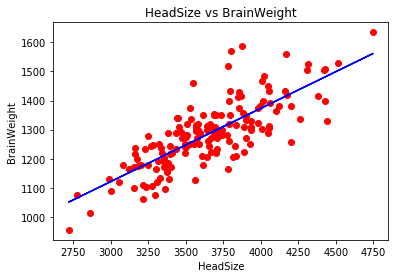

In [6]:
#plot chart 
plot.scatter(xTrain, yTrain, color='red')
plot.plot(xTrain, lr.predict(xTrain),color='blue')
plot.title('HeadSize vs BrainWeight')
plot.xlabel('HeadSize')
plot.ylabel('BrainWeight')
plot.show()

In [8]:
#print model score, coef and intercept
print('Model score :', round(lr.score(xTrain, yTrain),4))
print('Coef        :', lr.coef_)
print('Intercept   :', round(lr.intercept_,4))

Model score : 0.6167
Coef        : [0.2522]
Intercept   : 364.5509


## Prediction

In [9]:
#prediction using given data
new_hs = 4261
predict_bw = lr.predict([[new_hs]])
predict_bw

array([1439.2775])